In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [12]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [13]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


In [14]:
%matplotlib inline

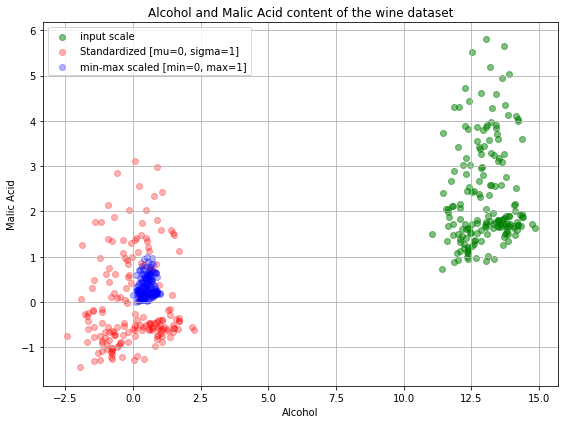

In [23]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [mu=0, sigma=1]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()